# Cancer Prediction Model

Cancer poses a substantial global health challenge; however, ongoing progress in research, early detection
methods, and treatment option provides optimism for enhanced patient outcomes. Intrigued by the quest for 
a deeper understanding of the determinants contributing to the onset of cancer,I find myself compelled to embark on this
project.

### Mision and vision

This undertaking aspires to meticulously explore and construct a machine learning model with the primary objective of 
Predicting the likelihood of a Patient getting cancer giving certain health records such as age, gender, smoking, fatigue
and allergy.

### About the dataset

Constrained by the ethical considerations surrounding data usage, stringent public health privacy policies,
and challenges associated with suboptimal data collection practices,authentic datasets for my project were unattainable.
I have acquired synthetic data from Kaggle.com, which will serve as the cornerstone for my project.

For the gender variable
> Male----0


> Female--1

for the other variables/features
> yes/Positive----1


> No/Negative-----0

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import ipywidgets as widgets
import numpy as np
from ipywidgets import interact
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    recall_score,
    accuracy_score,
    roc_auc_score,
    f1_score,
    precision_score,
    classification_report,
    confusion_matrix,
)

In [2]:
# Import dataset
df = pd.read_csv('cancer_prediction_dataset.csv')
print(f'The data set has {df.shape[0]} observations and {df.shape[1]} variables')
df.head()

The data set has 10000 observations and 6 variables


,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1


In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Gender   10000 non-null  int64
 1   Age      10000 non-null  int64
 2   Smoking  10000 non-null  int64
 3   Fatigue  10000 non-null  int64
 4   Allergy  10000 non-null  int64
 5   Cancer   10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [4]:
# checking for missing values
print(df.isnull().sum())

Gender     0
Age        0
Smoking    0
Fatigue    0
Allergy    0
Cancer     0
dtype: int64


#### All Variables look great with no missing data

In [5]:
# Printing all the columns of the dataset
df.columns

Index(['Gender', 'Age', 'Smoking', 'Fatigue', 'Allergy', 'Cancer'], dtype='object')

# Exploratory Data Analysis [EDA]

In [6]:
# Performing value counts for all the features
cols=['Smoking', 'Gender','Fatigue', 'Allergy', 'Cancer']
for col in cols:
    print(df[col].value_counts())
    print('-'*35)

1    5002
0    4998
Name: Smoking, dtype: int64
-----------------------------------
0    5025
1    4975
Name: Gender, dtype: int64
-----------------------------------
1    5018
0    4982
Name: Fatigue, dtype: int64
-----------------------------------
0    5001
1    4999
Name: Allergy, dtype: int64
-----------------------------------
0    9036
1     964
Name: Cancer, dtype: int64
-----------------------------------


>There a lot of male patients than female Patient

> patients who smoke are higher than those who do not smoke

>Patients who suffer from fatigue are higher than those who do not suffer from fatigue

>Patients without allergies are higher than those with allergies

>Patients who do not suffer from cancer are higher than those who suffer from cancer


<div style= "background-color: #fbceb1; padding: 10px;">
    <strong>Note!!!</strong>
    <br>
    we don't normally use gender for analysis and modelling due to data ethics but since this is health issue and a matter of concern for all, we'd use it
     </div>

0    5025
1    4975
Name: Gender, dtype: int64


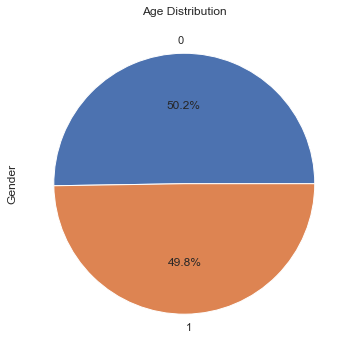

In [7]:
# GENDER
sns.set(rc={'figure.figsize':(8,6)})
g = df.Gender.value_counts()
print(g)
# Visualizing the gender
g.plot.pie(autopct = '%1.1f%%')
plt.title('Age Distribution');

In [8]:
# Proportion of value counts for gender expressed as Percentage(%)
g = df.Gender.value_counts(normalize = True) * 100
g

0    50.25
1    49.75
Name: Gender, dtype: float64

minimum Age; 18
maximum Age; 100
mean Age; 59.3184
median Age; 60.0


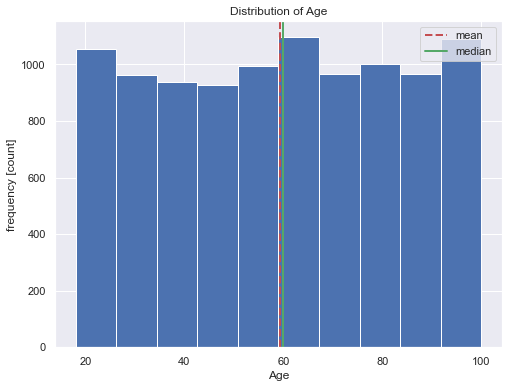

In [9]:
# AGE
min = df.Age.min()
max = df.Age.max()
mean = df.Age.mean()
median = df.Age.median()
print('minimum Age;', min)
print('maximum Age;', max)
print('mean Age;', mean)
print('median Age;', median)
# ploting
df.Age.hist()
plt.axvline(mean,color='r',linewidth=2,linestyle='--',label='mean')
plt.axvline(median,color='g',linewidth=2,linestyle='-',label='median')
plt.xlabel('Age')
plt.ylabel('frequency [count]')
plt.title('Distribution of Age')
plt.legend();

### Fatigue Analysis

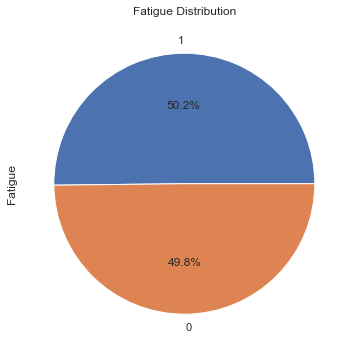

In [10]:
# VISUALIZATION OF FATIGUE
import matplotlib.pyplot as plt
df.Fatigue.value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Fatigue Distribution');

In [11]:
# Gender Distribution of Patients with Fatigue
df[df['Fatigue']==1].Gender.value_counts().to_frame()

,Gender
0,2550
1,2468


Male patients suffer from fatigue than female patients

In [12]:
prop_female_fatigue=(2468/4975)*100
prop_male_fatigue=(2550/5025)*100
print('percentage of male with fatigue:',prop_male_fatigue)
print('percentage of female with fatigue:',prop_female_fatigue)

percentage of male with fatigue: 50.74626865671642
percentage of female with fatigue: 49.608040201005025


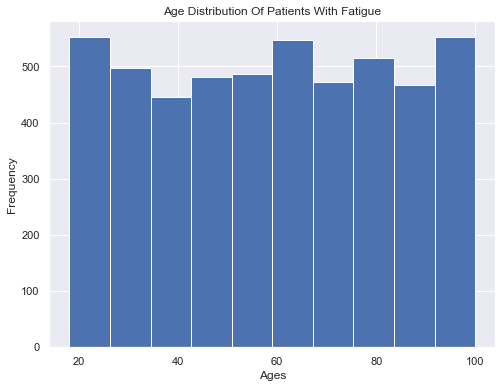

In [13]:
# Age Distribution of patients with fatigue
df.Fatigue.value_counts()
df[df['Fatigue']==1].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution Of Patients With Fatigue");

We can see from the distribution that adults patients in the range [20 to 35] and the aged in the range [60 to 100] suffer from 
fatigue more than every other patient form any other age ranges

This can be that majority of adult are in the labour force  and also the aged are weak. 
Patients within these age ranges are more likely to suffer from fatigue

### smoking Analysis

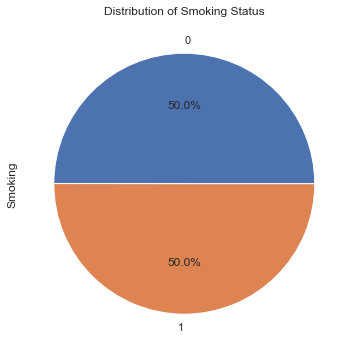

In [14]:
#VISUALIZATION OF SMOKING [COUNTS]
df.Smoking.value_counts().sort_values().plot.pie(autopct = '%1.1f%%')
plt.title('Distribution of Smoking Status');

In [15]:
# Gender Distribution of Patients who Smokes
df[df['Smoking']==1].Gender.value_counts().to_frame()

,Gender
1,2508
0,2494


Female patients smokes more than male patients

In [16]:
prop_female_smokes=(2508/4975)*100
prop_male_smokes=(2494/5025)*100
print('percentage of male who smokes:',prop_male_smokes)
print('percentage of female who smokes:',prop_female_smokes)

percentage of male who smokes: 49.6318407960199
percentage of female who smokes: 50.41206030150753


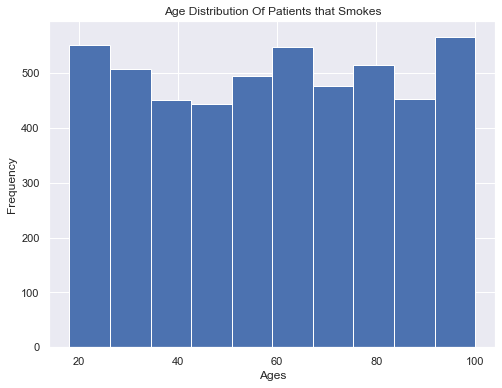

In [17]:
# Age Distribution of patients who Smokes
df.Smoking.value_counts()
df[df['Smoking']==1].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution Of Patients that Smokes");

The aged patients in the age range [60 to 100] smokes more than every patients in other age ranges 

### Allergy Analysis

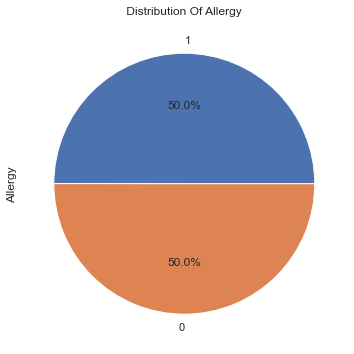

In [18]:
# VISUALIZATION OF ALLERGY[COUNTS]
df.Allergy.value_counts().sort_values().plot.pie(autopct = '%1.1f%%')
plt.title(' Distribution Of Allergy ');

In [19]:
# Gender Distribution of Patients who has allergy
df[df['Allergy']==1].Gender.value_counts().to_frame()

,Gender
0,2530
1,2469


Male patients have allergies more than female patients

In [20]:
prop_female_allergy=(2469/4975)*100
prop_male_allergy=(2530/5025)*100
print('percentage of male with allergy:',prop_male_allergy)
print('percentage of female who allergy:',prop_female_allergy)

percentage of male with allergy: 50.34825870646766
percentage of female who allergy: 49.62814070351759


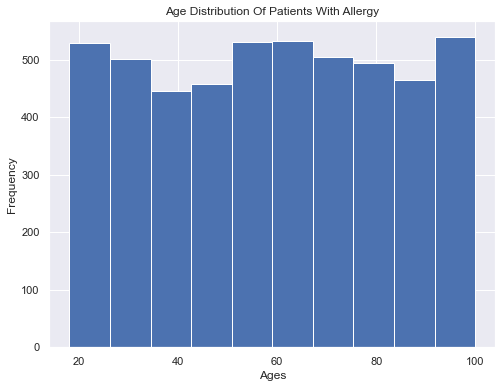

In [21]:
# Age Distribution of patients with Allergies
df.Smoking.value_counts()
df[df['Allergy']==1].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution Of Patients With Allergy");

The aged patients in the age range [60 to 100] have allergies more than every patients in other age ranges

### CANCER ANALYSIS

0    90.36
1     9.64
Name: Cancer, dtype: float64


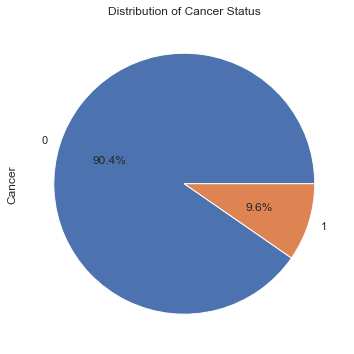

In [22]:
#VISUALIZATION OF CANCER[% COUNTS]
cancer_counts = df.Cancer.value_counts(normalize = True)*100
print(cancer_counts)
cancer_counts.plot.pie(autopct = '%1.1f%%')
plt.title('Distribution of Cancer Status');

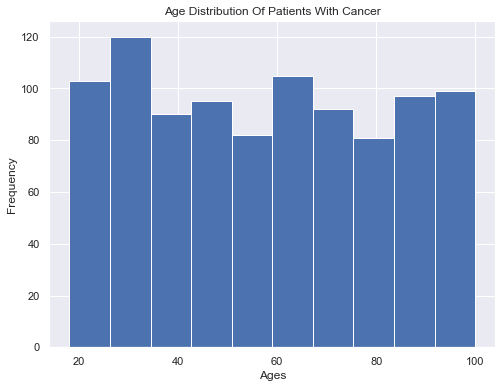

In [23]:
# Age Distribution of patient who had Cancer
df.Cancer.value_counts()
df[df['Cancer']==1].Age.hist()
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Age Distribution Of Patients With Cancer");

Adult patients within the age range [20 to 40]  suffer from cancer than every patients in any other age ranges

In [24]:
# Cancer Patients with fatigue
Canc_fat=df[df['Cancer']==1].Fatigue.value_counts()
Canc_fat.to_frame()

,Fatigue
0,483
1,481


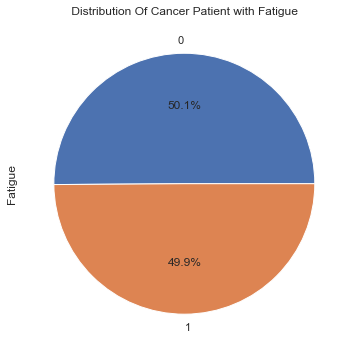

In [25]:
Canc_fat.plot.pie(autopct = '%1.1f%%')
plt.title(' Distribution Of Cancer Patient with Fatigue ');

Patients without fatigue suffers from cancer than patients with fatigue

In [26]:
# Cancer Patients with Allergies
Canc_all=df[df['Cancer']==1].Allergy.value_counts()
Canc_all.to_frame()

,Allergy
1,488
0,476


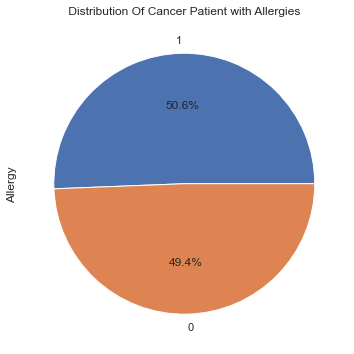

In [27]:
Canc_all.plot.pie(autopct = '%1.1f%%')
plt.title(' Distribution Of Cancer Patient with Allergies ');

Patients with Allergies suffers from cancer than patients without Allergies

In [28]:
# Cancer Patients with Smoking Status
Canc_smo=df[df['Cancer']==1].Smoking.value_counts()
Canc_smo.to_frame()

,Smoking
0,488
1,476


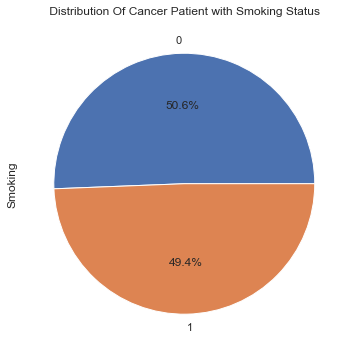

In [29]:
Canc_smo.plot.pie(autopct = '%1.1f%%')
plt.title(' Distribution Of Cancer Patient with Smoking Status ');

Patients who do not smoke suffer from cancer than patients who smoke

In [30]:
# Average Cancer Rate
mean = df.Cancer.mean()
print('The expected Probability of Cancer is:', mean)

The expected Probability of Cancer is: 0.0964


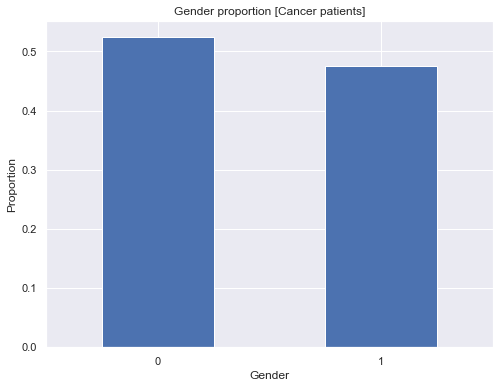

In [31]:
# Gender Distribution of Patients with Cancer
df[df['Cancer']==1].Gender.value_counts(normalize=True).plot.bar()
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.title('Gender proportion [Cancer patients]')
plt.xticks(rotation=0);

 From the above chart, male patients suffer from cancer than female patients

In [32]:
prop_female_stroke=(458/4975)*100
prop_male_stroke=(506/5025)*100
print(f'percentage of male with stroke: {round(prop_male_stroke, 2)}')
print(f'percentage of female with stroke: {round(prop_female_stroke, 2)}')

percentage of male with stroke: 10.07
percentage of female with stroke: 9.21


In [33]:
# cancer rate per gender
df.groupby('Gender').aggregate({'Cancer':'mean'})

,Cancer
Gender,
0,0.100697
1,0.092060


male patients has higher rate of getting cancer than female patients

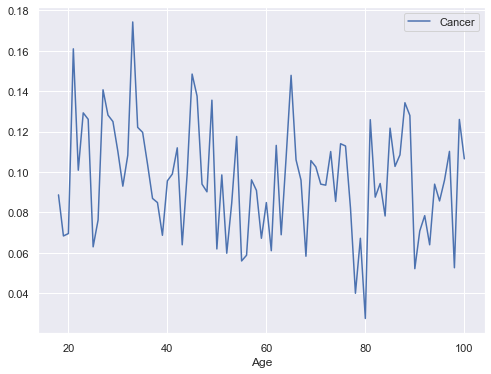

In [34]:
# Cancer rate per Age Distribution
df.groupby('Age').aggregate({'Cancer':'mean'}).plot();

# Performing more analysis on the dataset

In [35]:
d = df[ (df['Cancer']==1) & (df['Age']<=19)]
d

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
326,1,18,0,0,1,1
583,1,18,1,0,1,1
1634,0,19,0,0,0,1
2243,0,18,0,1,1,1
2511,0,18,1,0,1,1
2526,1,18,0,0,0,1
3339,0,18,0,1,1,1
3346,0,19,1,0,0,1
3528,0,18,0,1,0,1
4038,0,18,1,0,0,1


##### Nineteen teenage Patients has Cancer which is very sad

In [36]:
#Lets now find theier proportion out of the total cancer Patients
teen_age = (19/964)*100
print(f"The Percentage  teenage Patients with Cancer: {round(teen_age, 2)}%.")

The Percentage  teenage Patients with Cancer: 1.97%.


In [37]:
d = df[ (df['Cancer']==1) & (df['Age']>=60)]
d

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
4,1,95,1,0,1,1
37,1,63,1,0,0,1
47,1,71,0,0,1,1
64,0,95,1,0,0,1
76,0,83,0,1,1,1
...,...,...,...,...,...,...
9864,0,72,0,0,1,1
9877,0,76,0,1,0,1
9884,1,97,0,0,1,1
9891,0,65,1,1,0,1


##### 466 Old Age Patients suffers from cancer.  

In [38]:
#Lets now find theier proportion out of the total cancer Patients
old_age = (466/964)*100
print(f"The Percentage Old Age Patients with Cancer: {round(old_age,2)}%.")

The Percentage Old Age Patients with Cancer: 48.34%.


In [39]:
#Lets now find theier proportion out of the total cancer Patients
adult_age = ((964-466)/964)*100
print(f"The Percentage Old Age Patients with Cancer: {round(adult_age,2)}%.")

The Percentage Old Age Patients with Cancer: 51.66%.


##### We Can see that Majority of the Cancer Patient are below Old Age (60)

### Lets do some further Masking Analysis

In [40]:
d = df[(df['Gender'] == 1) & (df['Allergy'] == 1) & (df['Smoking']==1) & (df['Fatigue']==1) & (df['Cancer']==1) & (df['Age']<=25)]
d

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
1188,1,23,1,1,1,1
2086,1,25,1,1,1,1
2286,1,20,1,1,1,1
4125,1,23,1,1,1,1
6040,1,24,1,1,1,1
8729,1,18,1,1,1,1
8795,1,21,1,1,1,1


##### seven female patients at Age 25 and less smokes, have allergies,fatigue and Cancer.


In [41]:
df[(df['Gender'] == 0) & (df['Allergy'] == 1) & (df['Smoking']==1) & (df['Fatigue']==1) & (df['Cancer']==1) & (df['Age']<=25)]

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
1157,0,25,1,1,1,1
6858,0,21,1,1,1,1
7545,0,21,1,1,1,1
9976,0,23,1,1,1,1


##### four male patients, with their Ages less than 25 smokes, have allergies,fatigue and Cancer.


In [42]:
df[(df['Gender'] == 1) & (df['Smoking']==1)  & (df['Cancer']==1) & (df['Age']<=45)]

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
65,1,27,1,0,1,1
80,1,33,1,0,0,1
86,1,45,1,0,0,1
93,1,31,1,0,1,1
182,1,41,1,1,0,1
...,...,...,...,...,...,...
9156,1,32,1,0,1,1
9499,1,27,1,1,0,1
9634,1,22,1,1,0,1
9937,1,28,1,1,0,1


##### Eighty-four female Patients less than forty-five years of Age smokes and suffers from Cancer.

In [43]:
df[(df['Smoking']==1)  & (df['Cancer']==1) & (df['Age']>=60)]

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
4,1,95,1,0,1,1
37,1,63,1,0,0,1
64,0,95,1,0,0,1
78,1,63,1,0,1,1
214,0,91,1,1,1,1
...,...,...,...,...,...,...
9743,0,74,1,0,1,1
9808,0,86,1,1,0,1
9852,1,85,1,0,0,1
9891,0,65,1,1,0,1


##### Two-hundred and forty-three old Age patients Smokes and suffers from Cancer.

In [44]:
df[(df['Gender'] == 0) & (df['Smoking']==0)  & (df['Allergy']==0) & (df['Age']==50)]

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
257,0,50,0,0,0,0
945,0,50,0,0,0,0
1580,0,50,0,0,0,0
2866,0,50,0,0,0,0
4340,0,50,0,0,0,0
4386,0,50,0,1,0,0
4456,0,50,0,0,0,0
5801,0,50,0,1,0,0
6248,0,50,0,1,0,0
6929,0,50,0,0,0,0


##### Fifteen male Patients at Age fifty do not smoke and have Allergy.

<AxesSubplot:>

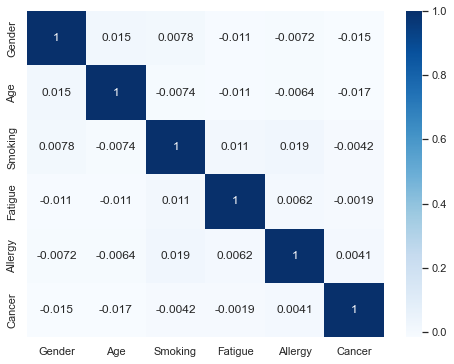

In [45]:
# Correlatiuon of features 
correlation=df.corr()
# Visualizing
sns.heatmap(correlation,cmap = 'Blues',annot= True)

###### Because there is a very week correlation between the target variable('Cancer') and the independent variables, the data wouldn't fit well with linear models such as Logistic regression model .In this Case we use non-linear models like decision trees or Random Forest

In [46]:
X = df.drop(columns=['Cancer'])                      
y = df['Cancer']

print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (10000, 5) 
y shape: (10000,)


In [47]:
X.head()

,Gender,Age,Smoking,Fatigue,Allergy
0,1,85,1,0,1
1,1,93,0,0,0
2,1,72,0,1,0
3,0,58,0,0,1
4,1,95,1,0,1


In [48]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 5)
y_train shape: (8000,)
X_test shape: (2000, 5)
y_test shape: (2000,)


# Building the model

### Baseline

In [49]:
# Calculating the baseline accuracy
acc_baseline = y_train.value_counts(normalize = True).max()
print('The baseline accuracy is ', round(acc_baseline * 100, 4), '%')

The baseline accuracy is  90.225 %


### Iterate

Using GridSearchCv to get the best hyperparameter for the model

In [50]:
# Creating a dictionary with range of hyperparameters for hyperparameter tunning
params = {
    "max_depth": range(25, 100, 25),  # Maximum depth of each tree
    "n_estimators": range(10,50,10), # Number of trees in the forest
    'min_samples_split':[5, 10, 15],# Minimum number of samples required to split a node
    'min_samples_leaf':[1, 2, 3],  # Minimum nuber of samples required at each leaf node
    'max_features':['sqrt','log2'], # Number of features to consider
}
params

{'max_depth': range(25, 100, 25),
 'n_estimators': range(10, 50, 10),
 'min_samples_split': [5, 10, 15],
 'min_samples_leaf': [1, 2, 3],
 'max_features': ['sqrt', 'log2']}

In [51]:
# Creating GridSearchCv to get the best hyperparameters for the model
model = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid = params,
    cv = 5, # Number of cross validations
    scoring='accuracy',
    n_jobs = -1, 
    verbose = 1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(25, 100, 25),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': range(10, 50, 10)},
             scoring='accuracy', verbose=1)

In [52]:
y_train.value_counts()

0    7218
1     782
Name: Cancer, dtype: int64

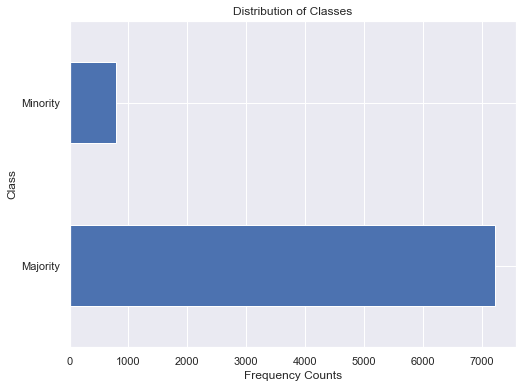

In [53]:
y_train.value_counts().plot.barh()
plt.ylabel("Class")
plt.xlabel("Frequency Counts")
plt.title("Distribution of Classes")
plt.xticks(rotation=0)
plt.yticks(ticks=[0, 1], labels=["Majority", "Minority"]);

Models tend to perform better on the majority class simply because there's more data available for that class. This can lead to a bias where the model predominantly predicts the majority class, often at the expense of the minority class accuracy.
We will therefore Oversample minority class and undersample majority classes to balance the class distribution.

In [54]:
# peforming OverSampling on the training data
ros = RandomOverSampler()
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

In [55]:
# Performing UnderSampling on the Training data
rus = RandomUnderSampler()
X_train_under, y_train_under = rus.fit_resample(X_train ,y_train)

In [56]:
# Printing the shape of our resampled data
print('X-over:',X_train_over.shape, "\ny-over:", y_train_over.shape)
print('X-under:',X_train_under.shape, "\ny-under:", y_train_under.shape)

X-over: (14436, 5) 
y-over: (14436,)
X-under: (1564, 5) 
y-under: (1564,)


In [57]:
y_train_over.value_counts()

0    7218
1    7218
Name: Cancer, dtype: int64

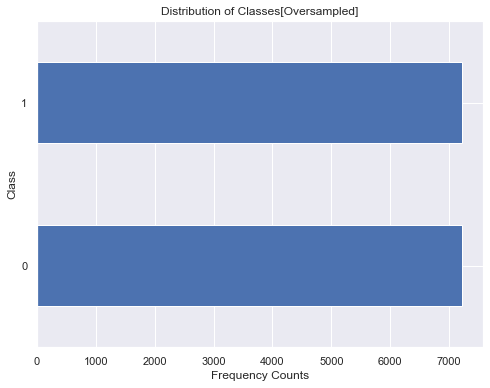

In [58]:
y_train_over.value_counts().plot.barh()
plt.ylabel("Class")
plt.xlabel("Frequency Counts")
plt.title("Distribution of Classes[Oversampled]")
plt.xticks(rotation=0);

In [59]:
y_train_under.value_counts()

0    782
1    782
Name: Cancer, dtype: int64

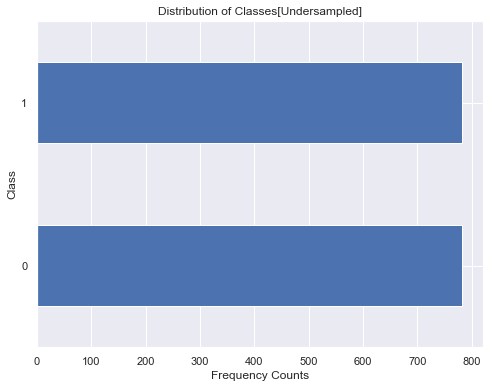

In [60]:
y_train_under.value_counts().plot.barh()
plt.ylabel("Class")
plt.xlabel("Frequency Counts")
plt.title("Distribution of Classes[Undersampled]")
plt.xticks(rotation=0);

In [61]:
y_test.value_counts()

0    1818
1     182
Name: Cancer, dtype: int64

In [62]:
# fitting the model in our training dataset
model=model.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [63]:
# finding the best params for the model
best_params= model.best_params_
best_params

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 15,
 'n_estimators': 30}

In [64]:
# creating a new model with best params
model_over = RandomForestClassifier(random_state = 42, **best_params)
model_over.fit(X_train_over,y_train_over)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=15, n_estimators=30, random_state=42)

In [65]:
model_under=RandomForestClassifier(random_state = 42, **best_params)
model_under.fit(X_train_under,y_train_under)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=15, n_estimators=30, random_state=42)

### EVALUATION OF THE MODEL

In [66]:
# Training and the test accuracy score on the normal  data
training_acc = model.score(X_train,y_train)
print(f"Training accuracy for training data data: {round(training_acc* 100, 4) }%")
testing_acc = model.score(X_test,y_test)
print(f"Test accuracy: {testing_acc * 100}%")

Training accuracy for training data data: 90.225%
Test accuracy: 90.9%


In [67]:
# Training and Test accuracy score on the oversampled data
training_acc_over = model_over.score(X_train_over, y_train_over)
print(f"Training accuracy for Oversampled training data data: {round(training_acc_over* 100, 4) }%")
testing_acc_over = model_over.score(X_test,y_test)
print(f"Test accuracy: {round(testing_acc_over * 100, 4)}%")

Training accuracy for Oversampled training data data: 77.9787%
Test accuracy: 59.25%


In [68]:
# Training and Test accuracy score on the Undersampled data
training_acc_under = model_under.score(X_train_over, y_train_over)
print(f"Training accuracy for Undersampled training data data: {round(training_acc_under* 100, 4) }%")
testing_acc_under = model_under.score(X_test,y_test)
print(f"Test accuracy: {round(testing_acc_under * 100), 4}%")

Training accuracy for Undersampled training data data: 61.2289%
Test accuracy: (48, 4)%


In [69]:
# predict the test data
y_pred = model.predict(X_test)
y_pred[:20]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [70]:
# Predicting the test data using the OverSampled model
y_pred_over = model_over.predict(X_test)
y_pred_over[:20]

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
      dtype=int64)

In [71]:
# Predicting the test data using the Undersampled data
y_pred_under = model_under.predict(X_test)
y_pred_under[:20]

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

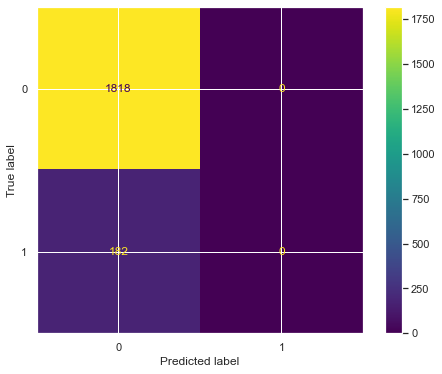

In [72]:
# create a confusion matrix for model analysis
ConfusionMatrixDisplay.from_estimator(model,X_test ,y_test );

In [73]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Calculate recall (also known as sensitivity or true positive rate)
recall = recall_score(y_test, y_pred)

# Calculate precision score
precision = precision_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

F1 Score: 0.0000
AUC-ROC Score: 0.4891
Recall: 0.0000
Precision: 0.0000


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Although the training accuracy and the testing accuracy for the imbalanced model was high and good, We can see that the model was not able to predict  cancer patients.We could tell from the recall accuracy and the precision accuracy  which was 0% . We will therefore Consider the model built on the resampled training data.


<div style= "background-color: #fbceb1; padding: 10px;">
    <strong>Note!!!</strong>
    <br>
    We dont only base the performance of the model of an unbalanced data  on  the models training  and testing accuracy. Metrics like the F1 Scrore, AUC-SCORE, Recall and Precision can  also be used for the performance of the model 
    </div>

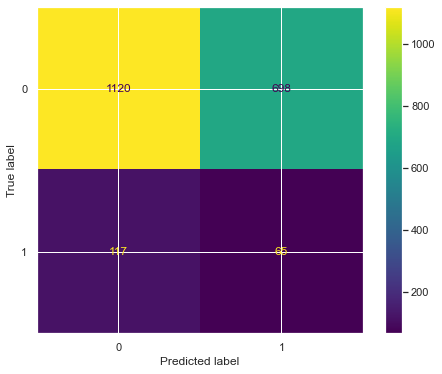

In [74]:
# create a confusion matrix for model analysis
ConfusionMatrixDisplay.from_estimator(model_over,X_test ,y_test );

In [75]:
y_pred_proba = model_over.predict_proba(X_test)[:, 1]
# Calculate F1 score
f1 = f1_score(y_test, y_pred_over)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Calculate recall (also known as sensitivity or true positive rate)
recall = recall_score(y_test, y_pred_over)

# Calculate precision score
precision = precision_score(y_test, y_pred_over)

print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

F1 Score: 0.1376
AUC-ROC Score: 0.4849
Recall: 0.3571
Precision: 0.0852


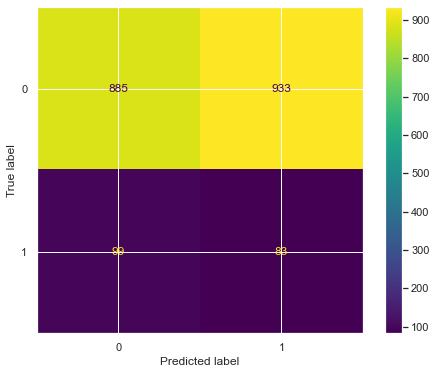

In [76]:
# create a confusion matrix for model analysis
ConfusionMatrixDisplay.from_estimator(model_under,X_test ,y_test );

In [77]:
y_pred_proba = model_under.predict_proba(X_test)[:, 1]
# Calculate F1 score
f1 = f1_score(y_test, y_pred_under)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Calculate recall (also known as sensitivity or true positive rate)
recall = recall_score(y_test, y_pred_under)

# Calculate precision score
precision = precision_score(y_test, y_pred_under)

print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

F1 Score: 0.1386
AUC-ROC Score: 0.5004
Recall: 0.4560
Precision: 0.0817


##### Woow! We Can now see that the model was able to predict some cancer patients after using a balanced training data for our model.At this point,  I will consider  the model built on the oversampled data because  we can  see that both the training and testing accuracy of the model built on the oversampled training data is higher than that of the undersampled training data. 

<div style= "background-color: #fbceb1; padding: 10px;">
    <strong>Definitions</strong>
    <br>
    The F1 Score:
 It is a metric that combines precision and recall into single values

AUC-ROC(Area Under the Receiver Operating Characteristic Curve): It is a performance metric that evaluates the ability of a model to distiguish between classes.
A higher AUC-ROC value closer to ONE(1) indicate better discrimination between positive and negative 
classes.



Recall(Sensitivity or True Positive Rate):
Recall measures the proportion of actual positive instance that were correctly predicted by the model.
A high recall value indicate that the model is effective at capyuring most of the positive instances,but
it may come at the cost of higher false positives.


Precision(Positive Predictive Value):
Precision measures the proportion of predicted Positives instances that were correctly classified.
A high precision value indicates that when the model predict a positive instance, It is likely to be correct.
    </div>


In [78]:
# Print classification report
print(classification_report(y_test,model_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.62      0.73      1818
           1       0.09      0.36      0.14       182

    accuracy                           0.59      2000
   macro avg       0.50      0.49      0.44      2000
weighted avg       0.83      0.59      0.68      2000



In [79]:
def make_cnf_matrix(threshold):
    y_pred_proba = model_over.predict_proba(X_test)[:,-1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"profit: €{tp * 100_000_000}")
    print(f"Losses: €{fp * 250_000_000}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


    
thresh_widget = widgets.FloatSlider(min=0, max=1, value=0.5, step=0.05)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

Suppose a model is used to predict whether a patient has cancer. If the model accurately identifies a patient as having cancer, and this diagnosis is correct, the hospital benefits significantly, gaining 100,000,000 dollars. This gain could be due to early treatment leading to better health outcomes, reduced long-term healthcare costs, or a reputation boost for the hospital. On the other hand, if the model incorrectly predicts cancer in a patient who does not have the disease, the hospital faces substantial losses, amounting to 250,000,000 dollars. These losses could stem from unnecessary treatments, legal implications, or damage to the hospital's reputation.

To navigate this high-stakes scenario, the hospital can adjust the prediction model's threshold for classifying a patient as having cancer. This threshold adjustment is a strategic decision aimed at either maximizing the hospital's profit or minimizing its losses, based on the hospital's priorities and risk tolerance. The choice of threshold influences the model's sensitivity and specificity, directly impacting financial outcomes and patient care quality.

## COMMUNICATION OF RESULT

In [80]:
index_list = X_train.columns.tolist()
index_list

['Gender', 'Age', 'Smoking', 'Fatigue', 'Allergy']

In [81]:
# Feature importance
feat_imp = model_over.feature_importances_.tolist()
feat_imp

[0.023029847163274553,
 0.9005991979234751,
 0.02878580251382412,
 0.023140817389138542,
 0.02444433501028776]

In [82]:
# feature importance dataframe
df_feat_imp = pd.DataFrame({'feature importance': feat_imp}, index=index_list)
df_feat_imp

,feature importance
Gender,0.023030
Age,0.900599
Smoking,0.028786
Fatigue,0.023141
Allergy,0.024444


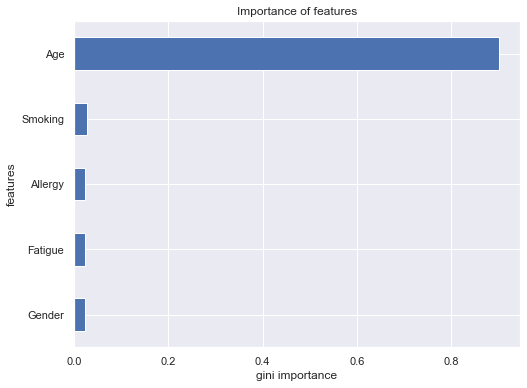

In [83]:
df_feat_imp.sort_values(by = 'feature importance', ascending=True).plot.barh(legend = False);

# label axis
plt.xlabel('gini importance')
plt.ylabel('features')
plt.title('Importance of features');

<div style= "background-color: #fbceb1; padding: 10px;">
    <strong>Conclusion</strong>
    <br>
    The observation that `Age` has the most influence on the model's performance" suggests that age is a significant factor in predicting the likelihood of cancer disease according to the model I've trained.The finding indicates that age plays a crucial role in determining the risk of cancer disease. It suggests that as individuals grow older, they might become more susceptible to cancer. This aligns with known medical literature, as cancer incidence tends to increase with age.
    </div>

# MODEL DEPLOYMENT 

In [84]:
model_over.predict_proba(X_test)[:,-1]

array([0.44452267, 0.75930072, 0.12345005, ..., 0.06373021, 0.10655026,
       0.        ])

In [85]:
import gradio as gr

# create a function to predict stroke
def predicta(Gender, Age, Smoking, Fatigue, Allergy):
    
    # create a dataframe with the inputs
    df = pd.DataFrame({
        'Gender': [Gender], 
        'Age':[ Age],
        'Smoking': [Smoking],
        'Fatigue': [Fatigue],
        'Allergy': [Allergy]
    })
    
    # make prediction
    y_pred = model_over.predict_proba(df)[:,1] 
    rounded_y_pred=np.round(y_pred,decimals=2)
    
    
    # return the stroke probabiity
    return rounded_y_pred[0]
    
    
    

# give the function an interface
app = gr.Interface(
    title= "Cancer Prediction App",
    fn=predicta,
    inputs=["number","number", "number", "number", "number"],
    outputs=["number"]
)
app.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
